# Análise de Dados e *Machine Learning* - NHL

<p align="center">
    <img width=550 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/web_hockey_basen_art.jpg?raw=true">
</p>

Muito inspirado por Michael Lewis e seu livro "*Moneyball: The Art of Winning an Unfair Game*" (leitura obrigatória para amantes da area que foi adaptado para o cinema com o título \"O Homem que Mudou o Jogo\", do diretor Bennett Miller) mostrou como a análise de dados aliado a um plano de jogo podem ser uma combinação fantástica. Nos últimos anos os avanços na tecnologia (dispositivos e sensores wearable como pulseiras eletrônicas, coletes, dispositivos GPS e outras tecnologias inteligentes) nos permitiram coletar cada vez mais dados. Entretanto, um monte de dados acumulados não são úteis se você não consegue interpretá-los. Portanto, tão importante quanto coletar dados estatísticos é saber decifrá-los. Com isso, a ciência de dados aplicada aos esportes já é uma realidade porque agora somos capazes de gerar valor através desses dados ajudando assim nas tomadas de decisão.

A análise desses novos dados possibilitou não apenas verificar estatísticas clássicas (vitorias, derrotas, gols feitos, gols sofridos..), mas tambem as estatísticas avançadas que procuram entender as diferentes maneiras com que uma jogada ou jogador pode influenciar uma partida. Com isso os times passaram a ser mais competitivos, sendo capazes de se prepararem  para um adversário ou até mesmo um jogador especifico que querem anular em uma partida. Tudo isso graças ao cruzamento de dados do histórico de desempenho dos atletas.

Outro uso da coleta desses dados está em beneficiar as grandes organizações com dados sociais, onde pode-se encontrar padrões e formar grupos dentro da base de fãs e executar campanhas em grupos-alvo. Conhecendo os fatores que mais atraem os fãs, a gestão das equipes pode se concentrar em melhorar esse aspecto, o que leva a ganhar novos fãs e reter os mais antigos. Os fãs podem ser alimentados com uma quantidade enorme de previsões e possibilidades em tempo real com as estatísticas do seu time ou jogador favorito onde podem comparar a sua performance com os outros jogadores no time rival ou do mesmo time.


A ciencia de dados tenta da sua maneira explorar as mesmas perguntas que os fãs e os treinadores se perguntam: quem eu acho que vai ganhar, e por quê? Quem são os melhores jogadores do mundo neste momento? Que estratégias são melhores, e porquê?.

<p align="center">
    <img width=650 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/player.png?raw=true">
</p>

Mas é bom não confiar cegamente nas estatísticas. Por mais que o esporte americano seja excelente para criar uma base sólida de dados, o fator humano nunca pode ser deixado de lado. As estatísticas podem dizer algo, mas o contexto precisa ser levado em conta. Fatores que ainda não são representados nos dados, como a condição psicológica e o humor dos jogadores, também são chaves importantes na hora de analisar o jogo.


# Importando Bibliotecas


In [1]:
# suprimir avisos
import warnings
warnings.filterwarnings("ignore")

# bibliotecas para analise dos dados
import numpy as np # algebra linear
import pandas as pd # procesamento dos dados
import datetime

from nhl_functions import show_goals, show_goals_result, team_win_loss

# setando opcoes globais do pandas
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# bibliotecas para visualização dos dados
%matplotlib inline
%config InlineBackend.figure_format = "svg"

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.rcParams["font.family"] = "sans-serif"

import seaborn as sns
sns.set_style("white")



# Aquisição dos Dados
Os dados que usaremos nesse projeto foram coletados utilizando a **NHL stats API** e desponibilizados por Martin Ellis na plataforma Kaggle no formato *.csv*. Não são apenas os resultados e as estatísticas dos jogos da NHL, mas também detalhes de jogadas individuais, como chutes, gols e defesas, incluindo data, hora e coordenadas x e y. Ao total são 9 conjuntos de dados que se relacionam como apresentado na tabela abaixo:

<p align="center">
    <img width=900 src="https://github.com/DanOliveira-DS/NHL/blob/master/images/table_relationships.JPG?raw=true">
</p>


# Descrição dos conjuntos de dados:

* **game**: Reúne os registros de cada jogo no conjunto de dados;

* **game_golie_stats**: As estatísticas dos goleiros que participaram dos jogos;
  
* **game_plays**: As jogadas individuais de cada jogo;
    
* **game_plays_player**: Os jogadores envolvidos em uma jogada;
    
* **game_skater_stats**: As estatísticas básicas dos jogadores. 36 entradas por jogo, uma para cada jogador do time;

* **game_teams_stats**: As estatísticas básicas das equipes. Cada jogo terá duas entradas nesta tabela, uma para cada equipe;

* **player_info**: Informações sobre os jogadores;
    
* **team_info**: informação sobre as equipes.

Caso esteja interessado em ver como os dados são coletados, indico o vídeo do [Kevin Sidwar](https://www.youtube.com/watch?v=avp7fvuMT1E&t=214s). Ele é também um dos responsaveis por dar inicio a documentação da NHL stats api

# Importando os conjuntos de dados

Como demonstrado antes os playoffs provaram ser uma competição onde todos possuem chance. Por essa razão vamos separar nosso conjunto de dados em fase regular e playoffs e analisar os goleiros nessas duas etapas.

In [17]:
# game_golie_stats
golie_stats = pd.read_csv('datasets/game_goalie_stats_cleaned.csv')

# separando entre fase regular e playoffs
golie_stats_regular = golie_stats[golie_stats["type"]== "R" ]
golie_stats_playoffs = golie_stats[golie_stats["type"]== "P" ]

# Analise Exploratoria dos Dados
Antes de resolver um problema, é preciso conhecer os dados. A Análise Exploratória de Dados reúne um conjunto de ferramentas úteis para resumir e visualizar as características de uma base de dados. Deve ser parte fundamental de qualquer projeto de ciência de dados. Essas técnicas possibilitam criar uma primeira intuição sobre os dados, o que permite conhecer as suas informações, padrões e lançar hipóteses. Assim, gerando insights que auxiliam na criação de modelos de Machine Learning. 

**Levantamento de hipóteses**:
* Qual goleiro com mais jogos nas duas fases?
* Qual goleiro com o melhor aproveitamento na fase regular, playoffs e de forma geral? (porcentagem de vitória)
* Qual goleiro com melhor taxa de defasas? (defesas pelo número de chutes)
* Goleiro com o melhor GAA?




## Conhecendo o conjunto de dados
A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as primeiras entradas. Isso possibilitará criar uma consciência situacional inicial a respeito do formato de entrada e da estrutura geral dos dados.


### Qual o tamanho dos conjuntos de dados? (Quantas observações e features)



In [18]:
# Dimensao do conjunto de dados com as estatisticas dos goleiros
print("DIMENSÃO DAS ESTATÍSTICAS DOS GOLEIROS NA FASE REGULAR:")
print(f"Entradas: {golie_stats_regular.shape[0]}")
print(f"Colunas: {golie_stats_regular.shape[1]}\n")

# PLayoffs
print("DIMENSÃO DAS ESTATÍSTICAS DOS GOLEIROS NOS PLAYOFFS:")
print(f"Entradas: {golie_stats_playoffs.shape[0]}")
print(f"Colunas: {golie_stats_playoffs.shape[1]}\n")


DIMENSÃO DAS ESTATÍSTICAS DOS GOLEIROS NA FASE REGULAR:
Entradas: 22945
Colunas: 17

DIMENSÃO DAS ESTATÍSTICAS DOS GOLEIROS NOS PLAYOFFS:
Entradas: 1701
Colunas: 17



In [26]:
# primeiras entradas 
golie_stats.head()

,game_id,season,type,team_name,golie_name,timeOnIce,assists,goals_for,pim,saves,shots,goals_against,savePercentage,powerPlaySaves,powerPlayShotsAgainst,powerPlaySavePercentage,outcome
0,2011030221,20112012,P,Devils,Martin Brodeur,3876,0,0,0,32,36,4,88.888889,7,8,87.5,L
1,2011030221,20112012,P,Flyers,Ilya Bryzgalov,3876,0,0,0,23,26,3,88.461538,4,5,80.0,W
2,2011030222,20112012,P,Devils,Martin Brodeur,3599,0,0,0,19,20,1,95.000000,1,1,100.0,W
3,2011030222,20112012,P,Flyers,Ilya Bryzgalov,3559,0,0,0,31,34,3,91.176471,6,6,100.0,L
4,2011030223,20112012,P,Flyers,Ilya Bryzgalov,4623,0,0,0,27,31,4,87.096774,1,2,50.0,L



### Descrição das variáveis:
* `game_id` - Número identificador da partida.
* `season` - Temporada em que ocorreu o jogo.
* `type` - Indica se os jogos aconteceram na temporada regular (R) ou playoffs (P).
* `team_name` - Nome do time.
* `golie_name` - Nome do goleiro.
* `timeOnIce` - Tempo total em segundos em que esteve jogando.
* `assists` - Qualquer assistência do jogador que leve ao gol.
* `goals_for` - Número de gols a favor.
* `pim` - Minutos de penalização atribuídos ao jogador.
* `saves` - Defesas feitas pelo goleiro.
* `shots` - Número de tentativas de disparos (incluindo disparos perdidos e bloqueados) que o goleiro enfrentou.
* `goals_against` - Número de gols sofridos (shots - saves).
* `savePercentage` - Porcentagem de defesas totais - (*`saves/shots`*) na partida.
* `PowerPlaySaves` - Defesas realizadas quando no power play na partida.
* `powerPlayShotsAgainst` - Disparos sofridos quando no power play na partida.
* `powerPlaySavePercentage` - Porcentagem de defesas no power play (*`powerPlaySaves/powerPlayShotsAgainst`*) na partida.
* `outcome` - resultado da partida: L (derrotado) e W (vitorioso)

### Quais são os tipos de dados das minhas features? (Numéricos, categóricos)
Vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas.

In [6]:
# tipos dos dados
golie_stats.dtypes.to_frame(name="tipo")

,tipo
game_id,int64
season,int64
type,object
team_name,object
golie_name,object
timeOnIce,int64
assists,int64
goals_for,int64
pim,int64
saves,int64


Nossas variáveis foram bem alocadas, portanto não e preciso realizar nenhuma alteração.

### Valores Ausentes
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessário um tratamento nos dados antes de realizarmos nossas análises.

In [7]:
# verificando valores ausentes
golie_stats.isna().sum()

game_id                       0
season                        0
type                          0
team_name                     0
golie_name                    0
timeOnIce                     0
assists                       0
goals_for                     0
pim                           0
saves                         0
shots                         0
goals_against                 0
savePercentage               39
powerPlaySaves                0
powerPlayShotsAgainst         0
powerPlaySavePercentage    2409
outcome                    1778
dtype: int64

Nossos valores ausentes se concentram nas variáveis [`savePercentage`,`powerPlaySavePercentage`,`outcome`]. No caso das variáveis `savePercentage`,`powerPlaySavePercentage` podemos achar os valores faltantes através das outras variáveis. A variável `outcome` apresenta um valor ausente quando existe uma substituição de goleiros na partida, assim para o goleiro substituído não e associado uma vitória ou derrota

In [44]:
golie_stats[(golie_stats["outcome"]!="W") & (golie_stats["outcome"]!="L")]

,game_id,season,type,team_name,golie_name,timeOnIce,assists,goals_for,pim,saves,shots,goals_against,savePercentage,powerPlaySaves,powerPlayShotsAgainst,powerPlaySavePercentage,outcome
24,2010030312,20102011,P,Lightning,Mike Smith,1129,0,0,0,8,8,0,100.000000,3,3,100.0,NaN
31,2010030314,20102011,P,Lightning,Dwayne Roloson,1078,0,0,0,6,9,3,66.666667,0,0,NaN,NaN
52,2012030312,20122013,P,Penguins,Marc-Andre Fleury,2604,0,0,0,14,17,3,82.352941,0,0,NaN,NaN
103,2012030124,20122013,P,Canadiens,Carey Price,3600,0,0,0,30,32,2,93.750000,1,1,100.0,NaN
116,2012030154,20122013,P,Wild,Darcy Kuemper,2393,0,0,0,16,18,2,88.888889,1,1,100.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24525,2018030154,20182019,P,Predators,Juuse Saros,2729,0,0,2,20,21,1,95.238095,3,3,100.0,NaN
24572,2018030222,20182019,P,Hurricanes,Petr Mrazek,1587,0,0,0,9,10,1,90.000000,0,1,0.0,NaN
24592,2018030224,20182019,P,Islanders,Thomas Greiss,2187,0,0,0,8,10,2,80.000000,4,4,100.0,NaN
24601,2018030236,20182019,P,Stars,Anton Khudobin,665,0,0,0,5,5,0,100.000000,1,1,100.0,NaN



### Estatística descritiva  dos dados
Como o nome sugere, ajudam a descrever e compreender os conjuntos de dados, apresentando-os de uma maneira mais significativa, o que permite uma interpretação mais simples dos dados. Aqui vamos ter as medidas de tendências centrais e de variabilidade.
As medidas de tendências centrais representa o ponto central ou valor típico de um conjunto de dados (**media, mediana e a moda**). Já as medidas de variabilidade representa a quantidade de dispersão num conjunto de dados, ou seja, definem a distância a que os pontos de dados tendem a cair do centro (**variância, desvio padrão, intervalo interquartil..**)

No pandas podemos usar a função *describe()* onde imediatamente obtemos um resumo contendo algumas das principais informações estatísticas relevantes:

* count – quantidade de entradas válidas
* mean – média dos valores
* std – desvio padrão
* min – menor valor da coluna
* 25% - (Q1) primeiro quartil 25
* 50% - mediana
* 75% - (Q3) terceiro quartil 75
* max – maior valor da coluna

Ainda é possível identificar colunas com possíveis *outliers* (por exemplo, olhando o valor da mediana e comparando com valores máximos e mínimos)



In [9]:
# resumo estatistico
golie_stats.loc[:, "timeOnIce":].describe()

,timeOnIce,assists,goals_for,pim,saves,shots,goals_against,savePercentage,powerPlaySaves,powerPlayShotsAgainst,powerPlaySavePercentage
count,24646.000000,24646.000000,24646.000000,24646.000000,24646.000000,24646.000000,24646.000000,24607.000000,24646.000000,24646.000000,22237.000000
mean,3370.277976,0.021139,0.000122,0.057007,25.655766,28.089426,2.433661,90.419754,3.714274,4.258744,84.470365
std,735.546513,0.145534,0.011032,0.473390,8.686874,8.840341,1.463965,7.739939,2.992856,3.188034,23.351857
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3516.000000,0.000000,0.000000,0.000000,21.000000,23.000000,1.000000,87.500000,1.000000,2.000000,75.000000
50%,3598.000000,0.000000,0.000000,0.000000,26.000000,29.000000,2.000000,91.666667,3.000000,4.000000,100.000000
75%,3600.000000,0.000000,0.000000,0.000000,31.000000,34.000000,3.000000,95.238095,5.000000,6.000000,100.000000
max,6972.000000,2.000000,1.000000,29.000000,60.000000,64.000000,10.000000,100.000000,25.000000,25.000000,100.000000


Podemos ver que grande parte das nossas variáveis apresentaram valores discrepantes (*outliers*). Entender a presença desses outliers é importante porque os valores discrepantes distorcem nossa distribuição o que pode influenciar negativamente na performance dos algoritmos de machine learning já que eles assumem uma distribuição normal (gaussiana) nas variáveis de entrada. 

Uma das alternativas e filtrar esses valores discrepantes, mas isso significa a perda de informação. Portanto, antes de qualquer ação vamos investigá-los e ver o quanto significativos são.

Como o cérebro humano tem dificuldade de processar grandes volumes de dados, uma das melhores abordagens é plotar a distribuição das variáveis. E o histograma e um gráfico que casa muito com o resumo estatístico que apresentamos. Vamos ao gráfico


#### Histogramas

Sao maneira rápida de ter uma ideia da distribuição de cada atributo é observar os histogramas. Os histogramas agrupam dados em posições e fornecem uma contagem do número de observações em cada posição. A partir da forma das caixas, você pode ter uma ideia rápida de se um atributo é gaussiano, inclinado(skewed) ou mesmo tem uma distribuição exponencial. Também pode ajudar a ver possíveis discrepâncias.

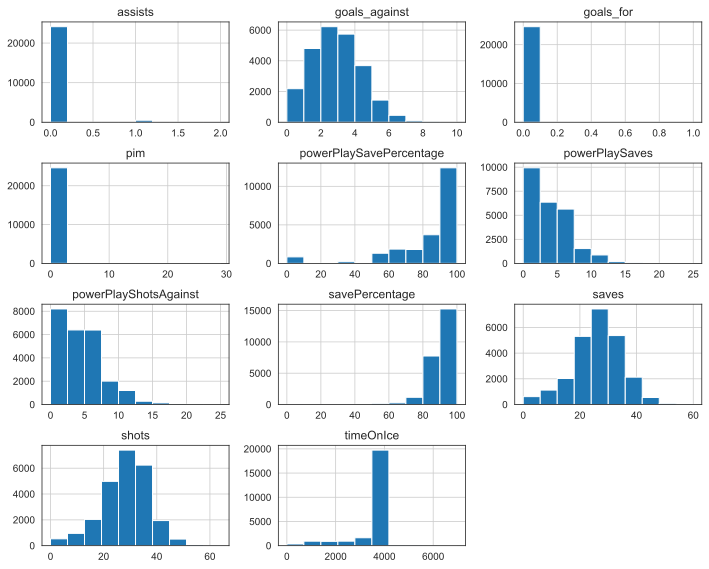

In [15]:
# histograma
golie_stats.loc[:, "timeOnIce":].hist(figsize=(10, 8))
plt.tight_layout()

* O comportamento exponencial visto nas variáveis `pim`, `powerPlayGoals` mostra a influência dos valores discrepantes distorcendo a distribuição. Na variavel `pim` por exemplo temos uma media de 10 min e um valor maximo de 183 minutos. Mais a frente iremos investigar para analisar tal valor.
* As variavel `season` apresentou um comportamento uniforme com uma queda bastante brusca. Vamos investigar para tentar responder tao comportamento.
* As outras variáveis apesar de apresentarem valores discrepantes como foi visto no resumo estatístico aparentemente não sofreu tanta influência do mesmo uma vez que a distribuição lembra bastante a normal (gaussiana).




Como demonstrado antes os *playoffs* provaram ser uma competição onde todos possuem chance. Por essa razão vamos separar nosso conjunto de dados em fase regular e *playoffs* e analisar os goleiros nessas duas etapas.

## Vamos separar os conjuntos de dados

In [33]:
# separando entre fase regular e playoffs
golie_stats_regular = golie_stats[golie_stats["type"]== "R" ]
golie_stats_playoffs = golie_stats[golie_stats["type"]== "P" ]

O número de entradas para o conjunto de dados dos *playoffs* e bem pequeno, algo já esperado por tudo que vimos anteriormente.

Antes de partimos para as perguntas vamos analisar os conjuntos de dados.

## Estatistica descritivas

In [35]:
# resumo estatistico fase regular
golie_stats_regular.loc[:, "timeOnIce":].describe()

,timeOnIce,assists,goals_for,pim,saves,shots,goals_against,savePercentage,powerPlaySaves,powerPlayShotsAgainst,powerPlaySavePercentage
count,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22945.000000,22909.000000,22945.000000,22945.000000,20665.000000
mean,3361.627675,0.021007,0.000131,0.056875,25.607976,28.046938,2.438963,90.391885,3.700545,4.242493,84.458713
std,723.584187,0.144921,0.011434,0.473531,8.614144,8.766120,1.464521,7.742850,2.991237,3.184190,23.367168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3517.000000,0.000000,0.000000,0.000000,21.000000,23.000000,1.000000,87.500000,1.000000,2.000000,75.000000
50%,3598.000000,0.000000,0.000000,0.000000,26.000000,29.000000,2.000000,91.666667,3.000000,4.000000,100.000000
75%,3600.000000,0.000000,0.000000,0.000000,31.000000,34.000000,3.000000,95.238095,5.000000,6.000000,100.000000
max,3900.000000,2.000000,1.000000,29.000000,59.000000,60.000000,10.000000,100.000000,25.000000,25.000000,100.000000


In [36]:
# Resumo estatistico playoffs
golie_stats_playoffs.loc[:, "timeOnIce":].describe()

,timeOnIce,assists,goals_for,pim,saves,shots,goals_against,savePercentage,powerPlaySaves,powerPlayShotsAgainst,powerPlaySavePercentage
count,1701.000000,1701.000000,1701.0,1701.000000,1701.000000,1701.000000,1701.000000,1698.000000,1701.000000,1701.000000,1572.000000
mean,3486.962963,0.022928,0.0,0.058789,26.300412,28.662551,2.362140,90.795758,3.899471,4.477954,84.623538
std,873.091646,0.153596,0.0,0.471619,9.593855,9.771456,1.454996,7.692953,3.009378,3.232412,23.156469
min,13.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000
25%,3507.000000,0.000000,0.0,0.000000,21.000000,23.000000,1.000000,87.878788,2.000000,2.000000,75.000000
50%,3599.000000,0.000000,0.0,0.000000,26.000000,29.000000,2.000000,92.307692,3.000000,4.000000,100.000000
75%,3600.000000,0.000000,0.0,0.000000,32.000000,34.000000,3.000000,95.833333,6.000000,6.000000,100.000000
max,6972.000000,2.000000,0.0,10.000000,60.000000,64.000000,8.000000,100.000000,16.000000,19.000000,100.000000


Comparando os dois conjuntos de dados:
* Tivemos mais jogos indo para o tempo extra na pós-temporada que na fase regular. Um indício de que os jogos nos *playoffs* são mais disputados/pegados.
* Na fase regular tivemos goleiros que marcaram gols. Como tivemos 1 como valor máximo indica que ele/eles fizeram apenas um gol. Investigaremos para saber qual o goleiro contribuíram para o time também no ataque.
* No caso das faltas (`pim`) tivemos um valor máximo de 29 minutos na fase regular e 10 na pós-temporada. Valores altos ainda mais para goleiros.
Em relação as outras variáveis tivemos comportamentos bem similares


## Goleiros que contribuiram no ataque


In [37]:
# tivemos goleiros com gols na NHL
golie_stats[golie_stats["goals_for"]>=1]

,game_id,season,type,team_name,golie_name,timeOnIce,assists,goals_for,pim,saves,shots,goals_against,savePercentage,powerPlaySaves,powerPlayShotsAgainst,powerPlaySavePercentage,outcome
3250,2013020120,20132014,R,Coyotes,Mike Smith,3600,0,1,0,31,33,2,93.939394,5,5,100.0,W
4204,2012020446,20122013,R,Devils,Martin Brodeur,3600,0,1,0,17,18,1,94.444444,3,4,75.0,W
21432,2011020522,20112012,R,Hurricanes,Cam Ward,3600,0,1,0,23,25,2,92.000000,2,2,100.0,W


Nosso conjunto de dados retornou 3 casos onde os goleiros marcaram. Foram eles:
* Mike Smith do *Arizona Coyotes* na temporada de 2013-2014
* Martin Brodeur do *New Jersey Devils* na temporada 2012-2013
* Cam Ward do *Carolina Hurricanes* na temporada de 2011-2012

ao total 12 goleiro diferentes marcaram ao menos um gol.



## Distribuicao dos gols tomados pelos goleiros


select a golie: Jordan Binnington


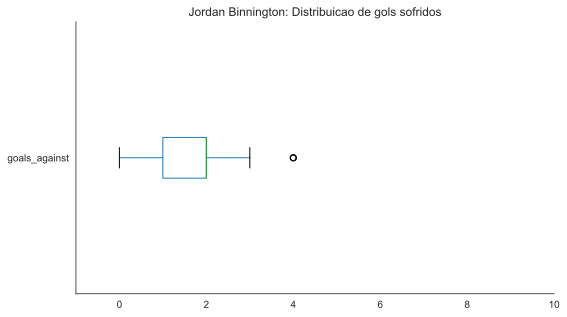

In [69]:
# REGULAR
golie_list = list(golie_stats_regular["golie_name"].sort_values().unique())
golie = input("select a golie: ")
fig, ax = plt.subplots(figsize=(8, 4.5))
golie_stats_regular[golie_stats_regular["golie_name"]==golie]["goals_against"].plot(kind="box", vert=False, ax=ax)
ax.set_title(golie + ": Distribuicao de gols sofridos")

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
    
ax.set_xlim(-1, 10)

plt.tight_layout()

In [57]:
# REGULAR
# numero de jogos na fase regular
reg_golie_games = golie_stats_regular["golie_name"].value_counts().to_frame(name="tot_jogos_reg")
reg_golie_games = reg_golie_games.reset_index()
reg_golie_games = reg_golie_games.rename(columns={"index":"golie_name"})
reg_golie_games = reg_golie_games.set_index("golie_name")


# vitorias na fase regular
reg_golie_wins = golie_stats_regular[golie_stats_regular["outcome"]== "W"].groupby(["golie_name"])["outcome"].value_counts().to_frame(name="vitorias_reg")
reg_golie_wins = reg_golie_wins.reset_index()
reg_golie_wins.drop("outcome", axis=1, inplace=True)
# setando golie_name como index
reg_golie_wins = reg_golie_wins.set_index("golie_name")

reg_golie_games = pd.merge(reg_golie_games, reg_golie_wins, on="golie_name")

reg_golie_games["taxa_vitorias_reg"] = reg_golie_games["vitorias_reg"]/reg_golie_games["tot_jogos_reg"]

# numero de chutes e defesas
reg_golie_games["shots_reg"] = golie_stats_regular.groupby(["golie_name"])["shots"].sum()
reg_golie_games["saves_reg"] = golie_stats_regular.groupby(["golie_name"])["saves"].sum()

# calculando porcentagem de defesa
reg_golie_games["taxa_defesas_reg"] = reg_golie_games["saves_reg"]/reg_golie_games["shots_reg"]

# add gols tomados
reg_golie_games["gols_tomados_reg"] = golie_stats_regular.groupby(["golie_name"])["goals_against"].sum()
# add tempo total no gelo
reg_golie_games["tempo_jogado_reg"] = golie_stats_regular.groupby(["golie_name"])["timeOnIce"].sum()

# add GAA
reg_golie_games["GAA_reg"] = round((reg_golie_games["gols_tomados_reg"]/reg_golie_games["tempo_jogado_reg"])*3600,2)


# PLAYOFFS
# numero de jogos nos playoffs
offs_golie_games = golie_stats_playoffs["golie_name"].value_counts().to_frame(name="tot_jogos_pos")
offs_golie_games = offs_golie_games.reset_index()
offs_golie_games = offs_golie_games.rename(columns={"index":"golie_name"})
offs_golie_games = offs_golie_games.set_index("golie_name")


# vitorias nos playoffs
offs_golie_wins = golie_stats_playoffs[golie_stats_playoffs["outcome"]== "W"].groupby(["golie_name"])["outcome"].value_counts().to_frame(name="vitorias_pos")
offs_golie_wins = offs_golie_wins.reset_index()
offs_golie_wins.drop("outcome", axis=1, inplace=True)
# setando golie_name como index
offs_golie_wins = offs_golie_wins.set_index("golie_name")

offs_golie_games = pd.merge(offs_golie_games, offs_golie_wins, on="golie_name")

offs_golie_games["taxa_vitorias_pos"] = offs_golie_games["vitorias_pos"]/offs_golie_games["tot_jogos_pos"]

# numero de chutes e defesas
offs_golie_games["shots_pos"] = golie_stats_playoffs.groupby(["golie_name"])["shots"].sum()
offs_golie_games["saves_pos"] = golie_stats_playoffs.groupby(["golie_name"])["saves"].sum()

# calculando porcentagem de defesa
offs_golie_games["taxa_defesas_pos"] = offs_golie_games["saves_pos"]/offs_golie_games["shots_pos"]

# add gols tomados
offs_golie_games["gols_tomados_pos"] = golie_stats_playoffs.groupby(["golie_name"])["goals_against"].sum()
# add tempo total no gelo
offs_golie_games["tempo_jogado_pos"] = golie_stats_playoffs.groupby(["golie_name"])["timeOnIce"].sum()

# add GAA
offs_golie_games["GAA_pos"] = round((offs_golie_games["gols_tomados_pos"]/offs_golie_games["tempo_jogado_pos"])*3600,2)


### UNINDO OS DOIS NOVOS CONJUNTOS

In [41]:
golie_total = pd.merge(reg_golie_games, offs_golie_games, on="golie_name")

In [42]:
golie_total[:10].style.format({"taxa_vitorias_reg":"{:.2%}", "taxa_defesas_reg":"{:.2%}", "GAA_reg":"{:.3}", "taxa_vitorias_pos":"{:.2%}", "taxa_defesas_pos":"{:.2%}", "GAA_pos":"{:.3}"})

,tot_jogos_reg,vitorias_reg,taxa_vitorias_reg,shots_reg,saves_reg,taxa_defesas_reg,gols_tomados_reg,tempo_jogado_reg,GAA_reg,tot_jogos_pos,vitorias_pos,taxa_vitorias_pos,shots_pos,saves_pos,taxa_defesas_pos,gols_tomados_pos,tempo_jogado_pos,GAA_pos
golie_name,,,,,,,,,,,,,,,,,,
Henrik Lundqvist,519,272,52.41%,15376,14130,91.90%,1246,1820258,2.46,98,47,47.96%,2936,2719,92.61%,217,360827,2.17
Pekka Rinne,510,279,54.71%,14533,13362,91.94%,1171,1786669,2.36,83,43,51.81%,2392,2188,91.47%,204,297045,2.47
Marc-Andre Fleury,496,291,58.67%,13963,12806,91.71%,1157,1734843,2.4,80,40,50.00%,2391,2179,91.13%,212,288895,2.64
Carey Price,490,261,53.27%,14458,13301,92.00%,1157,1738890,2.4,41,20,48.78%,1254,1156,92.19%,98,154351,2.29
Jonathan Quick,483,248,51.35%,12899,11809,91.55%,1090,1692148,2.32,79,44,55.70%,2322,2148,92.51%,174,293384,2.14
Devan Dubnyk,471,231,49.04%,13502,12384,91.72%,1118,1612216,2.5,26,8,30.77%,708,640,90.40%,68,89967,2.72
Sergei Bobrovsky,457,255,55.80%,13363,12281,91.90%,1082,1582317,2.46,34,11,32.35%,1041,939,90.20%,102,116865,3.14
Tuukka Rask,445,240,53.93%,12341,11357,92.03%,984,1536179,2.31,76,43,56.58%,2377,2209,92.93%,168,285999,2.11
Jimmy Howard,444,206,46.40%,12420,11335,91.26%,1085,1511185,2.58,36,16,44.44%,1104,1014,91.85%,90,128607,2.52


### Qual goleiro com mais jogos nas duas fases?

In [81]:
print("GOLEIRO COM MAIS JOGOS NA FASE REGULAR: ")
golie_max_games = golie_total["tot_jogos_reg"].idxmax()
number_games_reg = golie_total["tot_jogos_reg"].max()
print(f"{golie_max_games} com {number_games_reg} jogos\n")


print("GOLEIRO COM MAIS JOGOS NA POS-TEMPORADA: ")
golie_max_pos = golie_total["tot_jogos_pos"].idxmax()
number_games_pos = golie_total["tot_jogos_pos"].max()
print(f"{golie_max_pos} com {number_games_pos} jogos")

GOLEIRO COM MAIS JOGOS NA FASE REGULAR: 
Henrik Lundqvist com 519 jogos

GOLEIRO COM MAIS JOGOS NA POS-TEMPORADA: 
Henrik Lundqvist com 98 jogos


<p aling="center">
    <img width=500 src="https://nypost.com/wp-content/uploads/sites/2/2020/08/Henrik-Lundqvist-1.jpg?quality=90&strip=all&w=618&h=410&crop=1">
</p>

Henrik Lundqvist e o goleiro com mais jogos na NHL tanto na fase regular como na pos-temporada somando um total de 617 jogos. O goleiro foi selecionando pelo time de Nova Iorque os ***Rangers*** no ano de 2000 e continua com o time ate os dias de hoje, ao total sao 19 temporadas.

### Qual goleiro com o melhor aproveitamento na fase regular, playoffs e de forma geral? (porcentagem de vitória)

    

In [97]:
print("Goleiros com os melhores aproveitamentos fase Regular:")
print(golie_total[golie_total["tot_jogos_reg"]>=150]["taxa_vitorias_reg"].sort_values(ascending=False)[:10].to_string())


print("\nGoleiros com os melhores aproveitamentos na pos-temporada:")
print(golie_total[golie_total["tot_jogos_pos"]>=50]["taxa_vitorias_pos"].sort_values(ascending=False)[:10].to_string())

Goleiros com os melhores aproveitamentos fase Regular:
golie_name
Braden Holtby         0.611905
Matt Murray           0.602484
Andrei Vasilevskiy    0.596154
Marc-Andre Fleury     0.586694
Frederik Andersen     0.580442
Sergei Bobrovsky      0.557987
Corey Crawford        0.552273
Connor Hellebuyck     0.551887
Ben Bishop            0.550964
Pekka Rinne           0.547059

Goleiros com os melhores aproveitamentos na pos-temporada:
golie_name
Tuukka Rask          0.565789
Corey Crawford       0.558140
Jonathan Quick       0.556962
Braden Holtby        0.539326
Pekka Rinne          0.518072
Martin Jones         0.516129
Marc-Andre Fleury    0.500000
Henrik Lundqvist     0.479592


### Qual goleiro com melhor taxa de defasas? (defesas pelo número de chutes)

In [98]:
print("Goleiros com os melhores taxas de defesas fase Regular:")
print(golie_total[golie_total["tot_jogos_reg"]>=150]["taxa_defesas_reg"].sort_values(ascending=False)[:10].to_string())


print("\nGoleiros com os melhores taxas de defesas na pos-temporada:")
print(golie_total[golie_total["tot_jogos_pos"]>=50]["taxa_defesas_pos"].sort_values(ascending=False)[:10].to_string())

Goleiros com os melhores taxas de defesas fase Regular:
golie_name
Tim Thomas            0.923457
John Gibson           0.921449
Ben Bishop            0.920899
Tuukka Rask           0.920266
Carey Price           0.919975
Cory Schneider        0.919593
Pekka Rinne           0.919425
Andrei Vasilevskiy    0.919419
Sergei Bobrovsky      0.919030
Roberto Luongo        0.918992

Goleiros com os melhores taxas de defesas na pos-temporada:
golie_name
Tuukka Rask          0.929323
Braden Holtby        0.927850
Henrik Lundqvist     0.926090
Jonathan Quick       0.925065
Corey Crawford       0.919149
Martin Jones         0.916763
Pekka Rinne          0.914716
Marc-Andre Fleury    0.911334


 ### Goleiro com o melhor GAA?
 
 Goals Against Average (GAA) mede o número médio de gols que o goleiro permite em cada jogo regulamentar. É ajustado para os minutos que o goleiro joga.

Um GAA mais baixo é um sinal de que um goleiro permite poucos gols durante um jogo. Um GAA mais alto é um sinal de que um goleiro permite muitos gols durante um jogo.

Formula:

    GAA = (Goals Against ÷ Minutes Played) x Regulation Game Length in Minutes



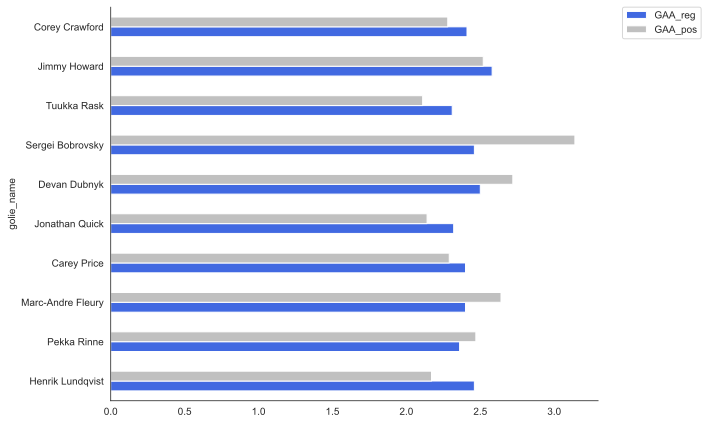

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
golie_total[["GAA_reg", "GAA_pos"]][:10].plot(kind="barh", color=["royalblue","silver"], ax=ax)

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

#  remover xticks do eixo x
plt.tick_params(
    axis='both',         
    which='both',     
    bottom=False,      
    top=False,
    left=False,
    labelbottom=True) 


plt.tight_layout()

In [84]:
golie_total.sort_values(by="tot_jogos_pos", ascending=False)

,tot_jogos_reg,vitorias_reg,taxa_vitorias_reg,shots_reg,saves_reg,taxa_defesas_reg,gols_tomados_reg,tempo_jogado_reg,GAA_reg,tot_jogos_pos,vitorias_pos,taxa_vitorias_pos,shots_pos,saves_pos,taxa_defesas_pos,gols_tomados_pos,tempo_jogado_pos,GAA_pos
golie_name,,,,,,,,,,,,,,,,,,
Henrik Lundqvist,519,272,0.524085,15376,14130,0.918965,1246,1820258,2.46,98,47,0.479592,2936,2719,0.926090,217,360827,2.17
Braden Holtby,420,257,0.611905,12101,11110,0.918106,991,1445119,2.47,89,48,0.539326,2675,2482,0.927850,193,331811,2.09
Corey Crawford,440,243,0.552273,12442,11420,0.917859,1022,1524526,2.41,86,48,0.558140,2585,2376,0.919149,209,329570,2.28
Pekka Rinne,510,279,0.547059,14533,13362,0.919425,1171,1786669,2.36,83,43,0.518072,2392,2188,0.914716,204,297045,2.47
Marc-Andre Fleury,496,291,0.586694,13963,12806,0.917138,1157,1734843,2.40,80,40,0.500000,2391,2179,0.911334,212,288895,2.64
Jonathan Quick,483,248,0.513458,12899,11809,0.915497,1090,1692148,2.32,79,44,0.556962,2322,2148,0.925065,174,293384,2.14
Tuukka Rask,445,240,0.539326,12341,11357,0.920266,984,1536179,2.31,76,43,0.565789,2377,2209,0.929323,168,285999,2.11
Martin Jones,286,154,0.538462,7664,6986,0.911534,678,988152,2.47,62,32,0.516129,1730,1586,0.916763,144,218704,2.37
Ben Bishop,363,200,0.550964,9962,9174,0.920899,788,1235870,2.30,49,28,0.571429,1414,1313,0.928571,101,171143,2.12
